In [110]:
import os
import re
import matplotlib.pyplot as plt
import networkx as nx
import math
import pandas as pd
import json

In [161]:
class ProjectSchemeGraph:
    # building graph only on a project consisting .py files
    
    def __init__(self, project_path):
        self.project_path = project_path
    
    
    def __make_edges(self):
        filelist = []
        for root, dirs, files in os.walk(self.project_path):
                for i in files:
                    filelist.append(os.path.join(root, i))
        filelist = [x for x in filelist if len(re.findall(r'\.py$', x)) != 0]
        
        edges = []
        for p_script in filelist:
            with open(p_script) as f:
                p_script_txt = f.read()
            p_script_txt = p_script_txt.split('\n')

            list_imports = [x for x in p_script_txt if 'from' in x]
            
            scripts_sub = [re.sub(r'\s+', ' ',x).strip().split(' ')[1] 
                           if len(re.sub(r'\s+', ' ',x).strip().split(' ')) > 1
                           else x for x in list_imports]

            scripts = []
            for i in scripts_sub:
                try:
                    scripts.append(re.search(r'(.*\.)(.*)', i).group(2))
                except AttributeError:
                    pass
            for i in scripts:
                try:
                    edges.append([i+'.py', re.search(r'(.*/)(.*)', f.name).group(2)])
                except:
                    pass
                
        return edges

    
    def plot_graph(self, save=False, node_size=180, font_size=5):
        try:
            G = nx.DiGraph()
            G.add_edges_from(self.__make_edges())
            pos = nx.spring_layout(G, k=7/math.sqrt(G.order()), scale=6)
            plt.figure()    
            nx.draw(G, pos, edge_color='grey',width=0.1, linewidths=1,
                    node_size=node_size, node_color='yellowgreen',alpha=0.8,
                    labels={node: node for node in G.nodes()}, font_size=font_size, 
                    verticalalignment='top', with_labels = True, arrowstyle='-|>', arrowsize=10)
            plt.axis('off')
            plt.title(f"{re.search(r'(.*/)(.*)', self.project_path).group(2)} Project Scheme")
            plt.rcParams["figure.dpi"] = 1100

            if not save:
                plt.show()
            else:
                plt.savefig(f"project_{re.search(r'(.*/)(.*)', self.project_path).group(2)}_scheme.png")
                plt.show()
        except ZeroDivisionError:
            raise Exception("Zero structure of the project or empty folder. Try to check directory")
            
            
    def save_edges(self, save_format='csv'):
        if len(self.__make_edges()) == 0:
            raise Exception("Zero structure of the project or empty folder. Try to check directory")
        else:
            if save_format == 'csv':
                df_edges = pd.DataFrame()
                df_edges['1_edge'] = [x[0] for x in self.__make_edges()]
                df_edges['2_edge'] = [x[1] for x in self.__make_edges()]
                df_edges.to_csv(f"p_{re.search(r'(.*/)(.*)', self.project_path).group(2)}_scheme.csv", index=False)
            elif save_format == 'excel':
                df_edges = pd.DataFrame()
                df_edges['1_edge'] = [x[0] for x in self.__make_edges()]
                df_edges['2_edge'] = [x[1] for x in self.__make_edges()]
                df_edges.to_csv(f"p_{re.search(r'(.*/)(.*)', self.project_path).group(2)}_scheme.xlsx", index=False)
            elif save_format == 'json':
                json_edges = {}
                for i in self.__make_edges():
                    json_edges[i[0]] = i[1]
                with open(f"p_{re.search(r'(.*/)(.*)', self.project_path).group(2)}_scheme.json", 'w') as fp:
                    json.dump(json_edges, fp)

Plot graph with saving

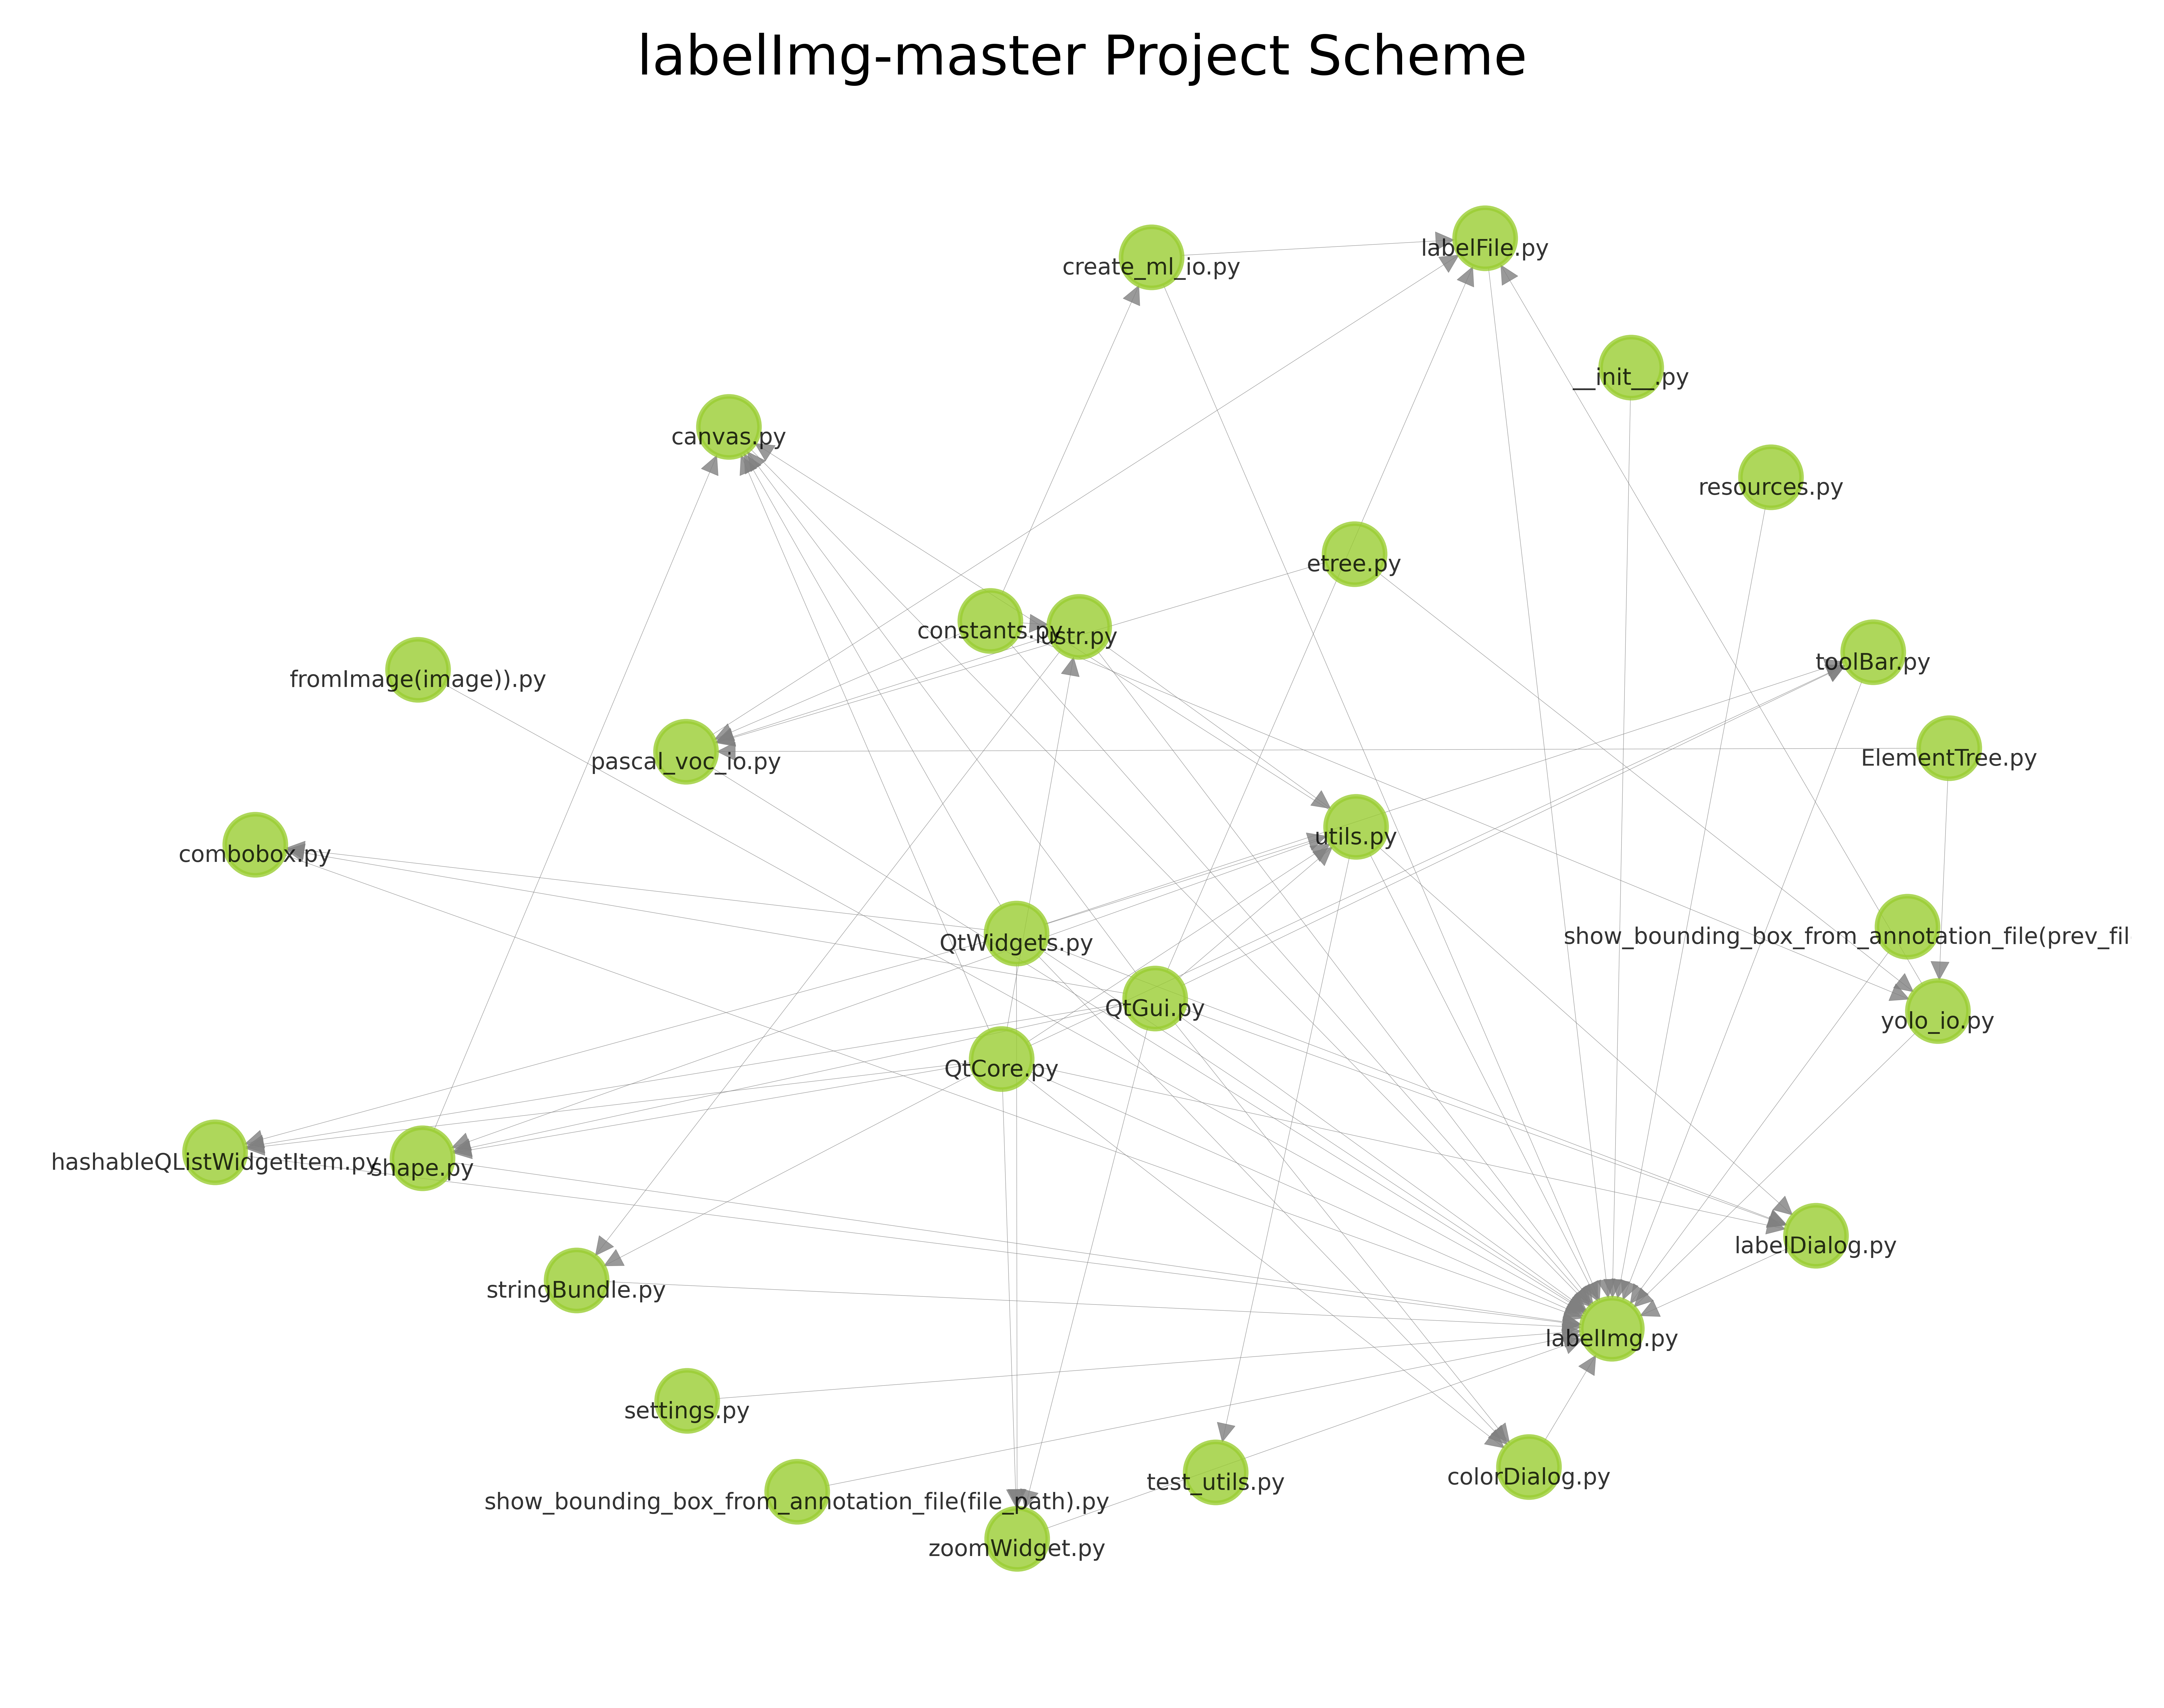

In [165]:
# project path should not end with '/'
scheme = ProjectSchemeGraph('project_path')
scheme.plot_graph(save=True)

Saving edges in .csv format

In [153]:
scheme.save_edges()

Saving edges in .xlsx format

In [154]:
scheme.save_edges(save_format='xlsx')

Saving edges in .json format

In [155]:
scheme.save_edges(save_format='json')